# Proyek Analisis Data: Air Quality in Huairou & Changping
- **Nama:** Mochamad Dendra Dwi Pratama Putra
- **Email:** artrialazz@gmail.com
- **ID Dicoding:** @crbsdndr

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara di kedua lokasi dari waktu ke waktu?
- Apakah meteorologi berpengaruh terhadap buruknya kualitas udara?
- Apakah kualitas udara memburuk saat waktu produtif manusia (8am - 9pm (src: Sistem 896 di perusahaan China))?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

**Information:** <br>
No: row number
year: year of data in this row <br>
month: month of data in this row <br>
day: day of data in this row <br>
hour: hour of data in this row <br>
PM2.5: PM2.5 concentration (ug/m^3) <br>
PM10: PM10 concentration (ug/m^3) <br>
SO2: SO2 concentration (ug/m^3) <br>
NO2: NO2 concentration (ug/m^3) <br>
CO: CO concentration (ug/m^3) <br>
O3: O3 concentration (ug/m^3) <br>
TEMP: temperature (degree Celsius) <br>
PRES: pressure (hPa) <br>
DEWP: dew point temperature (degree Celsius) <br>
RAIN: precipitation (mm) <br>
wd: wind direction <br>
WSPM: wind speed (m/s) <br>
station: name of the air-quality monitoring site

In [8]:
# Load dataset
huairou = pd.read_csv("./data/PRSA_Data_Huairou_20130301-20170228.csv")
changping = pd.read_csv("./data/PRSA_Data_Changping_20130301-20170228.csv")

In [9]:
huairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Hal yang saya temukan pada dataset ini adalah terdapat fitur waktu seperti fitur (year, month, day, hour). Dengan fitur ini saya bisa melacak kapan kualitas udara di sekitar menjadi kotor atau bersih, apakah kualitas udaranya semakin baik waktu ke waktu.
- Terdapat fitur polutan udara seperti (PM2.5, PM10, SO2, NO2, CO, O3). Fitur fitur ini bisa digunakan untuk mengecek kualitas udara, tampak fitur fitur tersebut menggunakan mikrogram per meter kubik sebagai unit pengukurannya.
- Terdapat fitur cuaca disekitar seperti (TEMP, PRES, DEWP, RAIN, wd, WSPM). Fitur fitur tersebut dapat digunakan untuk mengidentifikasi bagaimana fitur fitur cuaca tersebut berpengaruh terhadap tingginya atau rendahnya nilai fitur fitur polutan udara.
- Dan terakhir terdapat fitur lokasi yaitu stasiun sebagai lokasi yang ingin saya identifikasi kualitas udaranya.

### Assessing Data

In [11]:
huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [12]:
huairou.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [13]:
huairou.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [14]:
huairou[huairou.duplicated()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


In [15]:
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [17]:
changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [18]:
changping[changping.duplicated()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


In [19]:
# # Pilih kolom numerik
numeric_features = huairou.select_dtypes(include="number").columns

**Insight:**
- Tipe data sesuai
- Tidak ada nilai duplikat yang terdeteksi
- Dataset ini tidak memiliki yang tidak relavan
- Terdapat nilai yang kosong dalam jumlah yang banyak.
- Beberapa fitur memiliki perbedaan selisih nilai yang cukup besar antar quartil 0.25 dengan minimal dan kuartil 0.75 dengan maksimal. Menunjukan adanya outlier yang siginikan
- Saya melihat bahwa outlier yang signifikan di satu fitur bersignifikan juga di fitur lain, menandakan bahwa ini bukan kesalahan manusia
- Saya menemukan bahwa dataset ini memiliki variabilitas yang tinggi di fitur fitur tertentu seperti PM2.5, PM10, DEWP, O2, CO karena nilai Standar Deviasinya hampir mendekati Mean bahkan ada yang melebihi.


### Cleaning Data

In [20]:
# Hapus nilai kosong
huairou.dropna(inplace=True)
changping.dropna(inplace=True)

In [21]:
print(huairou.isna().sum())
print("-"*20)
print(changping.isna().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
--------------------
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Tidak ada data duplikat, outlier bukan merupakan kesalahan manusia, semua tipe data cocok dengan fitur. Maka dari itu di proses data cleaning saya  hanya fokus untuk menghapus sample data yang ada nilai hilangnya
- Saya memutuskan untuk menghapus nilainya karena saya tidak menemukan rumus untuk imputasi serta jumlah missing valuesnya terlalu kecil jika dibandingkan dengan jumlah sampel datanya, jadi variabilitasnya tidak terlalu menurun

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
POLLUTANT_FEATURES = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Breakpoint mengikuti standa EPA
BREAKPOINT = {
    'PM2.5': {
        "aqi_interval": {
            "lower_bound": [0, 51, 101, 151, 201, 301],
            "upper_bound": [50, 100, 150, 200, 300, 500]
        },
        "poll_interval": {
            "lower_bound": [0, 36, 76, 116, 151, 251],
            "upper_bound": [35, 75, 115, 150, 250, 350]
        }
    },
    'PM10': {
        "aqi_interval": {
            "lower_bound": [0, 51, 101, 151, 201, 301],
            "upper_bound": [50, 100, 150, 200, 300, 500]
        },
        "poll_interval": {
            "lower_bound": [0, 51, 151, 251, 351, 421],
            "upper_bound": [50, 150, 250, 350, 420, 600]
        }
    },
    'SO2': {
        "aqi_interval": {
            "lower_bound": [0, 51, 101, 151, 201, 301],
            "upper_bound": [50, 100, 150, 200, 300, 500]
        },
        "poll_interval": {
            "lower_bound": [0, 51, 151, 476, 801, 1601],
            "upper_bound": [50, 150, 475, 800, 1600, 2000]
        }
    },
    'NO2': {
        "aqi_interval": {
            "lower_bound": [0, 51, 101, 151, 201, 301],
            "upper_bound": [50, 100, 150, 200, 300, 500]
        },
        "poll_interval": {
            "lower_bound": [0, 41, 81, 181, 281, 566],
            "upper_bound": [40, 80, 180, 280, 565, 750]
        }
    },
    'CO': {
        "aqi_interval": {
            "lower_bound": [0, 51, 101, 151, 201, 301],
            "upper_bound": [50, 100, 150, 200, 300, 500]
        },
        "poll_interval": {
            "lower_bound": [0, 2001, 4001, 14001, 24001, 36001],
            "upper_bound": [2000, 4000, 14000, 24000, 36000, 50000]
        }
    },
    'O3': {
        "aqi_interval": {
            "lower_bound": [0, 51, 101, 151, 201, 301],
            "upper_bound": [50, 100, 150, 200, 300, 500]
        },
        "poll_interval": {
            "lower_bound": [0, 101, 161, 216, 266, 801],
            "upper_bound": [100, 160, 215, 265, 800, 1000]
        }
    }
}

def find_ip(feature, conc_pollutant):
    try:
        # Ambil data breakpoint
        aqi_lb = BREAKPOINT[feature]["aqi_interval"]["lower_bound"]
        aqi_ub = BREAKPOINT[feature]["aqi_interval"]["upper_bound"]
        poll_lb = BREAKPOINT[feature]["poll_interval"]["lower_bound"]
        poll_ub = BREAKPOINT[feature]["poll_interval"]["upper_bound"]

        # Inisialisasi dengan interval pertama
        aqi_lo = aqi_lb[0]
        aqi_hi = aqi_ub[0]
        poll_lo = poll_lb[0]
        poll_hi = poll_ub[0]

        # Cari interval yang sesuai
        for i in range(len(aqi_lb)):
            if poll_lb[i] <= conc_pollutant <= poll_ub[i]:
                aqi_lo = aqi_lb[i]
                aqi_hi = aqi_ub[i]
                poll_lo = poll_lb[i]
                poll_hi = poll_ub[i]
                break
        else:  # Jika konsentrasi melebihi semua interval
            return 500  # Nilai AQI maksimum

        # Hitung Index Pollutant
        ip = ((aqi_hi - aqi_lo) / (poll_hi - poll_lo)) * (conc_pollutant - poll_lo) + aqi_lo
        return round(ip, 2)

    except ZeroDivisionError:
        return 300

    except KeyError:
        print(f"Error: Polutan {feature} tidak terdaftar di BREAKPOINT")
        return 0

huairou_aqis = []
changping_aqis = []

for i in huairou.index:
    aqis = []
    for feature in POLLUTANT_FEATURES:
        conc = huairou.loc[i, feature]

        # Skip nilai negatif
        if conc < 0:
            continue

        aqi = find_ip(feature, conc)
        aqis.append(aqi)

    # Ambil AQI tertinggi
    if aqis:
        huairou_aqis.append(max(aqis))
    else:
        huairou_aqis.append(0)  # Fallback jika semua nilai invalid

for i in changping.index:
    aqis = []
    for feature in POLLUTANT_FEATURES:
        conc = changping.loc[i, feature]

        # Skip nilai negatif
        if conc < 0:
            continue

        aqi = find_ip(feature, conc)
        aqis.append(aqi)

    # Ambil AQI tertinggi
    if aqis:
        changping_aqis.append(max(aqis))
    else:
        changping_aqis.append(0)  # Fallback jika semua nilai invalid


huairou["AQI"] = huairou_aqis
changping["AQI"] = changping_aqis


In [23]:
huairou['time'] = pd.to_datetime(huairou[['year', 'month', 'day', 'hour']]) # Menggabungkan fitur waktu
changping['time'] = pd.to_datetime(changping[['year', 'month', 'day', 'hour']])
huairou.drop(columns=["No", 'year', 'month', 'day', 'hour'], inplace=True) # Menghapus fitur waktu sebelumnya dan fitu no
changping.drop(columns=["No", 'year', 'month', 'day', 'hour'], inplace=True)
huairou.reset_index(drop=True, inplace=True)
changping.reset_index(drop=True, inplace=True)

In [24]:
assemble = pd.concat([huairou, changping], axis=0)

In [25]:
huairou.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI,time
0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou,45.5,2013-03-01 00:00:00
1,4.0,4.0,3.0,3.0,200.0,85.0,-4.2,1022.3,-24.5,0.0,N,4.3,Huairou,42.5,2013-03-01 05:00:00
2,3.0,6.0,33.0,7.0,300.0,82.0,-5.9,1023.1,-21.9,0.0,WNW,0.6,Huairou,41.0,2013-03-01 06:00:00
3,3.0,10.0,13.0,13.0,400.0,71.0,-2.7,1024.3,-23.2,0.0,NNE,3.4,Huairou,35.5,2013-03-01 07:00:00
4,3.0,13.0,34.0,38.0,800.0,45.0,-1.6,1025.2,-23.5,0.0,NNE,4.6,Huairou,47.5,2013-03-01 08:00:00


In [26]:
changping.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI,time
0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,42.5,2013-03-01 00:00:00
1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,42.5,2013-03-01 01:00:00
2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,37.0,2013-03-01 02:00:00
3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,40.5,2013-03-01 03:00:00
4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,40.5,2013-03-01 04:00:00


In [27]:
assemble.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI,time
0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou,45.5,2013-03-01 00:00:00
1,4.0,4.0,3.0,3.0,200.0,85.0,-4.2,1022.3,-24.5,0.0,N,4.3,Huairou,42.5,2013-03-01 05:00:00
2,3.0,6.0,33.0,7.0,300.0,82.0,-5.9,1023.1,-21.9,0.0,WNW,0.6,Huairou,41.0,2013-03-01 06:00:00
3,3.0,10.0,13.0,13.0,400.0,71.0,-2.7,1024.3,-23.2,0.0,NNE,3.4,Huairou,35.5,2013-03-01 07:00:00
4,3.0,13.0,34.0,38.0,800.0,45.0,-1.6,1025.2,-23.5,0.0,NNE,4.6,Huairou,47.5,2013-03-01 08:00:00


**Insight:**
- Setelah melakukan explorasi saya memutuskan untuk membuat fitur baru bernama AQI memang dataset ini memiliki informasi yang emang dibuat khusus untuk membuaat fitur AQI.
- Saya menggabungkan fitur tahun, bulan, jam, dan hari. Karena supaya lebih simpel dan mudah untuk diaksesnya
- Saya melakukan drop pada fitur No karena sudah tidak relavan karena terjadi data cleaning. Serta pada dashboard pun sudah disediakan no, jadi saya menghapusnya karena tidak berguna dan malah membuat dataset ini menjadi tidak simpel.
- Dataset Changping dan Hairou digabungkan dengan alasan kedua dataset tersebut memiliki fitur yang sama, dan tujuan yang sama.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara di lokasi Huairou dari waktu ke waktu?

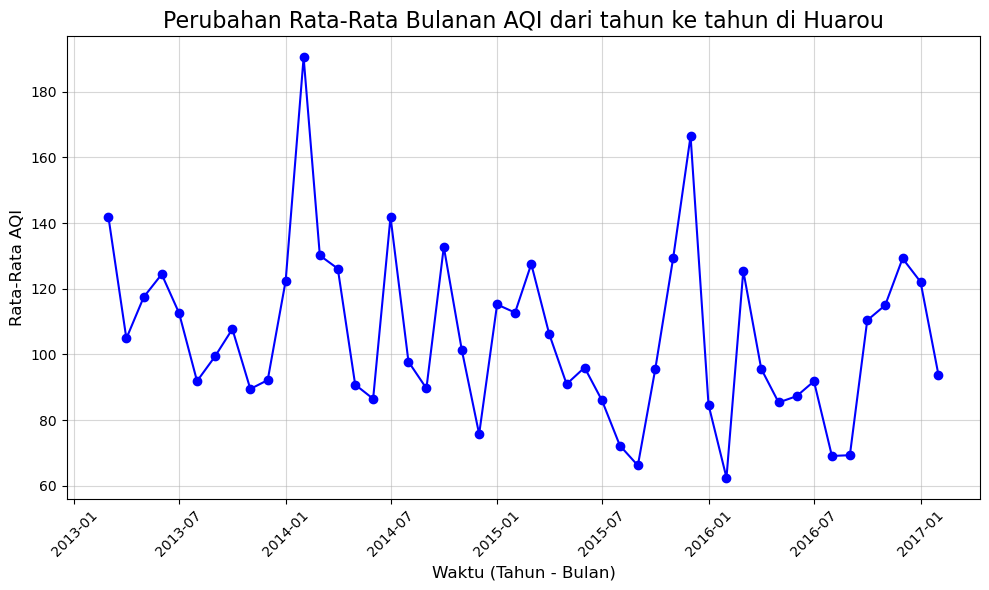

In [28]:
# Hitung rata-rata AQI berdasarkan kombinasi tahun-bulan pada kolom 'time'
monthly_avg = huairou.groupby(huairou['time'].dt.to_period('M')).mean(numeric_only=True)

# Reset index agar lebih mudah diakses
monthly_avg.reset_index(inplace=True)

# Ubah index dari period ke timestamp untuk visualisasi
monthly_avg['time'] = monthly_avg['time'].dt.to_timestamp()

# Visualisasi rata-rata line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['time'], monthly_avg['AQI'], marker='o', color='b', linestyle='-')
plt.title("Perubahan Rata-Rata Bulanan AQI dari tahun ke tahun di Huarou", fontsize=16)
plt.xlabel('Waktu (Tahun - Bulan)', fontsize=12)
plt.ylabel('Rata-Rata AQI', fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)  # Memiringkan label x-axis agar mudah dibaca
plt.tight_layout()
plt.show()

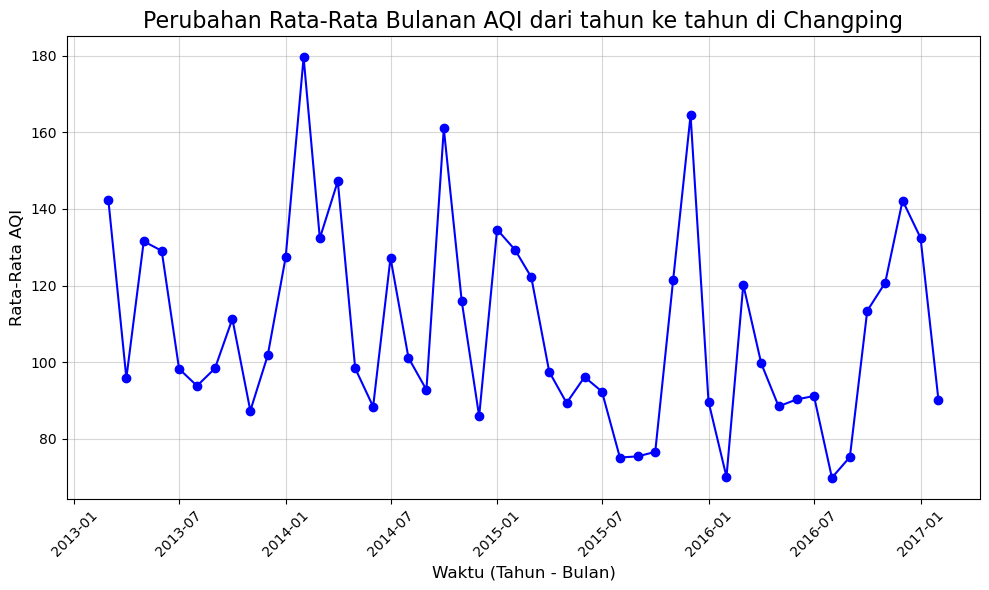

In [29]:
# Hitung rata-rata AQI berdasarkan kombinasi tahun-bulan pada kolom 'time'
monthly_avg = changping.groupby(changping['time'].dt.to_period('M')).mean(numeric_only=True)

# Reset index agar lebih mudah diakses
monthly_avg.reset_index(inplace=True)

# Ubah index dari period ke timestamp untuk visualisasi
monthly_avg['time'] = monthly_avg['time'].dt.to_timestamp()

# Visualisasi rata-rata line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['time'], monthly_avg['AQI'], marker='o', color='b', linestyle='-')
plt.title("Perubahan Rata-Rata Bulanan AQI dari tahun ke tahun di Changping", fontsize=16)
plt.xlabel('Waktu (Tahun - Bulan)', fontsize=12)
plt.ylabel('Rata-Rata AQI', fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)  # Memiringkan label x-axis agar mudah dibaca
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana korelasi fitur fitur polutan udara dengan dengan fitur fitur metorologi?

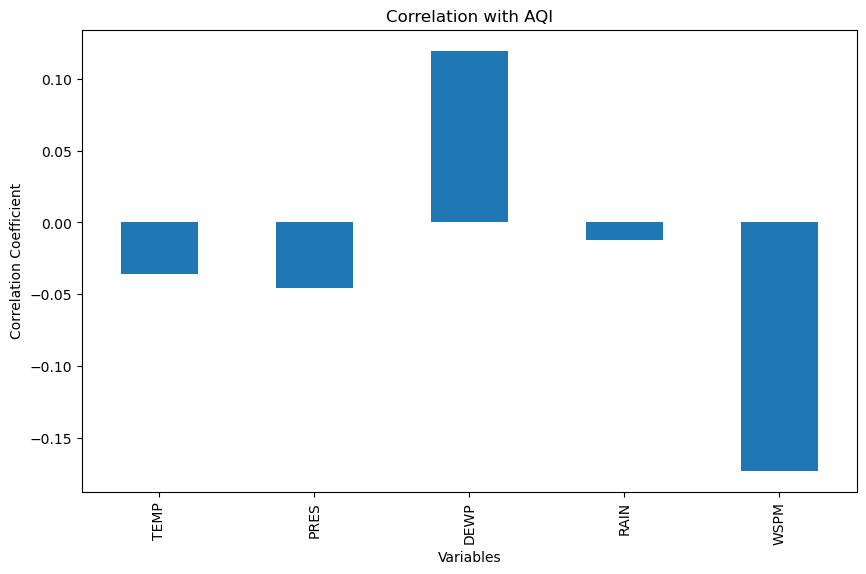

In [30]:
METEOROLOGIES = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "AQI"] #AQI tidak termasuk

corr_matrix = assemble[METEOROLOGIES].corr()  # Matriks korelasi
target_corr = corr_matrix['AQI'].drop('AQI')  # Korelasi dengan AQI, kecuali AQI itu sendiri

plt.figure(figsize=(10, 6))
target_corr.plot(kind='bar')
plt.title(f'Correlation with AQI')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

### Pertanyaan 3: Jam berapa biasanya kualitas udara menjadi buruk? Apakah waktunya bertepatan saat waktu produktif manusia (pagi - sore)?

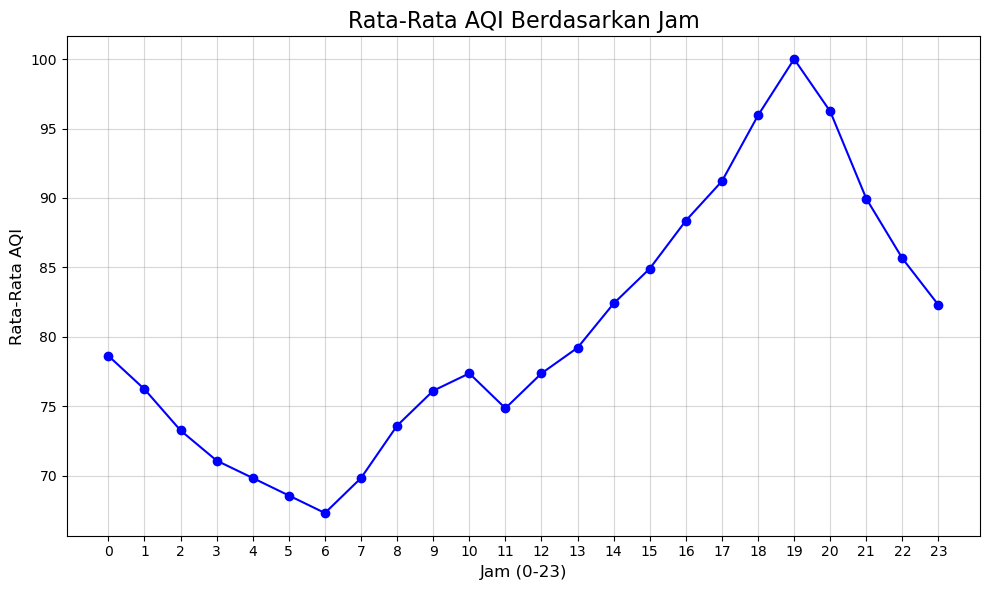

In [31]:
# Ekstrak jam dari kolom waktu
assemble["hour"] = assemble['time'].dt.hour

# Hitung rata-rata AQI berdasarkan jam (tanpa memperhatikan bulan/tahun)
hour_avg = assemble.groupby('hour')['AQI'].median().reset_index()

# Visualisasi rata-rata AQI per jam
plt.figure(figsize=(10, 6))
plt.plot(hour_avg['hour'], hour_avg['AQI'], marker='o', color='b', linestyle='-')
assemble.drop(columns='hour', inplace=True)
plt.title('Rata-Rata AQI Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-Rata AQI', fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(range(len(hour_avg)))
plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1: Visualisasi ini menunjukan downtrend di kedua lokasi terjadi lower high dan lower low, menunjukan terdapat langkah yang baik bagi masyarakat disekatar stasiun tersebut meskipun bisa dibilang nilai all time low 2015 masih terbilang nilai AQI yang sedang, gak baik baik banget dan gak buruk buruk banget. All time high menunjukkan angka disekitar 180 pada tahun 2014 ini cukup tinggi. Saat saya serching buruknya nilai AQI di tahun 2014 dan baiknya AQI pada tahun 2015 di beijing ini cukup masuk akal karena info yang saya dapat benar bahwa 2014 cukup parah nilai AQI nya dan 2015 nya juga tercatat memang benar rata rata rendah. Dari info info ini bisa disimpulkan bahwa masyarat di tahun 2014 mendapatkan dampak dari AQI yang tinggi ini mulai kapok hingga pada tahun 2015 terjadi langkah langkah yang baik bagi penurunan AQI.
- Pertanyaan 2: Diantara kelimat tersebut WSPM adalah fitur meteorologi dengan korelasi tertinggi menunjukan angka disekitaran -0.15. Ini cukup masuk akal karena WSPM merepresentasikan kecepatan udara dapat menyebarluaskan udara kotor yang terfokus ke satu lokasi saja menyebar ke beberapa lokasi menyebabkan nilai AQI menurun seiring naiknya nilai WSPM. Fitur dengan nilai korelasi kedua tertinggi adalah DEWP lagi lagi ini cukup masuk akal karena DEWP atau titik embun kedua tertinggi adalah DEWP lagi lagi ini cukup masuk akal karena DEWP atau titik embun jika nilainya naik fitur PM2.5 dan PM10 dapat menyerap uap air dan bertambah besar ukurannya. Partikel yang lebih besar ini bisa bertahan lebih lama di atmosfer, meningkatkan konsentrasi polutan. Untuk fitur meteorologi seperti rain menunjukan korelasi negatif, press korelasi negatif dan temp berkorelasi negatif, masuk akal.
- Pertanyaan 3: Titik terendah AQI menunjukan angka disekitar 90 pada jam 06:00 sebelum nilainya naik. Titik tertinggi AQI menunjukan angka disekitar 120 pada jam 19:00 sebelum nilainya turun. Ini menunjukkan bahwa aktivitas manusia berpengaruh terhadap tinggi atau rendahnyanilai AQI. Dikarenakan aktivitas manusia diluar ruangan secara umum dimulai pada pagi hari dan pulang ke rumah pada malam hari didukung dengan metode 896 di China yang menurut sistem tersebut beberapa perusahaan mengharuskan pekerja memulai pekerjaan pada jam 08:00 hingga hingga jam 19:00. Seperti yang anda lihat pada jam 06:00 nilai AQI mulai naik menunjukkan aktivitas manusia dimulai seperti transportasi bensin, udara pabrik, dsb. Dan terus naik pada jam 19:00 kemungkinan mayoritas manusia sedang dalam perjalanan pulang sebelum jam 19:00 hingga pada 19:00 kemungkinan mayoritas manusia sudah istirahat. Kesimpulannya bahwa aktivitas manusia berpengaruh.

## Analisis Lanjutan (Opsional)

**Alasan:** Lebih mudah dicerna oleh orang awam, dan lebih reprensentatif. Serta saya ingin melihat kategori mana yang paling banyak

In [32]:
# Definisi interval dan label
bins = [0, 50, 100, 200, 300, float('inf')]
labels = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Bahaya']

# Membuat kolom baru
assemble['Classification'] = pd.cut(
    assemble['AQI'],
    bins=bins,
    labels=labels,
    right=False
)

assemble["Classification"].value_counts()

Classification
Sedang                21052
Baik                  17689
Tidak Sehat           17099
Sangat Tidak Sehat     6491
Bahaya                 2058
Name: count, dtype: int64

In [33]:

assemble.to_csv("./dashboard/assemble.csv", index=False)

In [34]:
assemble["station"].value_counts().index.tolist()

['Changping', 'Huairou']

## Conclusion

- Saya memilih 2 dataset yaitu Huairou dan Changping, kedua dataset tersebut memiliki informasi yang menarik untuk dilakukan analisis data kualitas udara di stasiun. Meskipun dataset tersebut perlu dibersihkan terlebih dahulu karena terdapat missing values.
- Visualisasi data dapat menjawab pertanyaan pertanyaan binis dengan benar dan menghasilkan insight yang sangat menarik.
- Secara keseluruhn kualitas udara di kedua lokasi tersebut sangat memprihatinkan meskipun secara tahun demi tahun menunjukan penurunan.